<a href="https://colab.research.google.com/github/MOUNESH-M/crop-disease-detection-ai/blob/main/Crop_Disease_Detection_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# uploading kaggle.json(kaggle API Token) in colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mouneshm","key":"2118a5f94a429d4d8e94849c62528240"}'}

In [4]:
#configuring kaggle CLI
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#Downloading Dataset
!kaggle datasets download -d emmarex/plantdisease
!unzip plantdisease.zip -d plant_disease_dataset

Streaming output truncated to the last 5000 lines.
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plant_disease_dataset/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf__

In [6]:
#Exploring the Dataset
import os
base_dir = 'plant_disease_dataset'
for folder in os.listdir(base_dir):
  print(folder)

plantvillage
PlantVillage


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Detected classes:
- Pepper__bell___Bacterial_spot
- Pepper__bell___healthy
- Potato___Early_blight
- Potato___Late_blight
- Potato___healthy
- Tomato_Bacterial_spot
- Tomato_Early_blight
- Tomato_Late_blight
- Tomato_Leaf_Mold
- Tomato_Septoria_leaf_spot
- Tomato_Spider_mites_Two_spotted_spider_mite
- Tomato__Target_Spot
- Tomato__Tomato_YellowLeaf__Curl_Virus
- Tomato__Tomato_mosaic_virus
- Tomato_healthy


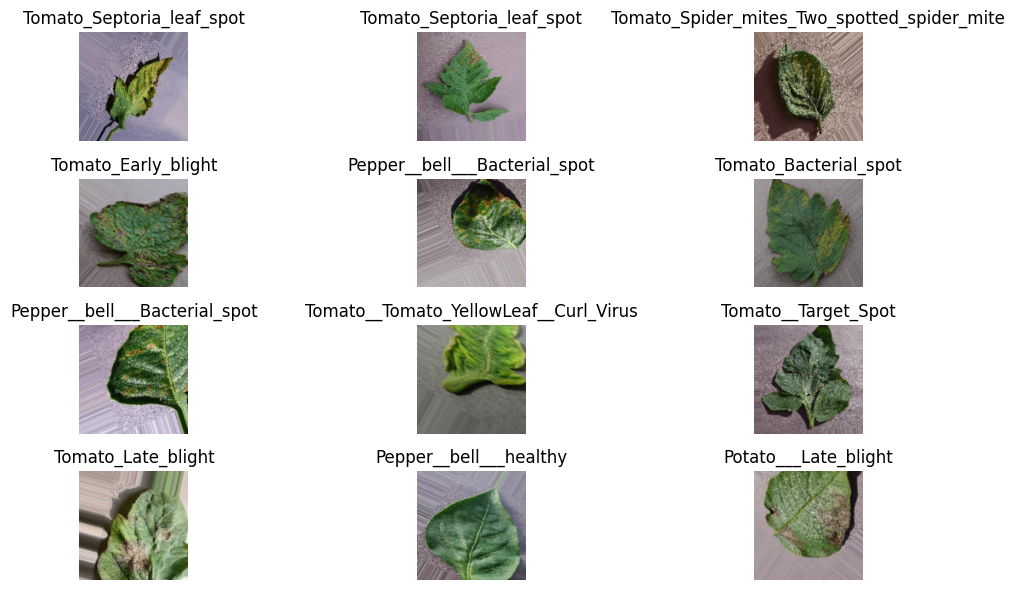

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

data_dir='plant_disease_dataset/PlantVillage'
IMG_SIZE=(128,128)
BATCH_SIZE=32
#Creating a image generator with desired agumentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

#Loading and augumenting the images form the dataset for training set
train_generator=train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True)

#for validation set
validation_generator=train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

class_names = list(train_generator.class_indices.keys())
print("Detected classes:")
for name in class_names:
    print(f"- {name}")


#Visualizing the sampels
class_names=list(train_generator.class_indices.keys())
x_batch,y_batch=next(train_generator)
plt.figure(figsize=(12,6))
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.imshow(x_batch[i])
  label=class_names[y_batch[i].argmax()]
  plt.title(label)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input

# Building the CNN Model
model = Sequential([
    Input(shape=(128, 128, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

#Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Training the Model
EPOCHS=20

history=model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 115s 216ms/step - accuracy: 0.3088 - loss: 2.1646 - val_accuracy: 0.6245 - val_loss: 1.1114
Epoch 2/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 105s 203ms/step - accuracy: 0.6127 - loss: 1.1732 - val_accuracy: 0.6987 - val_loss: 0.8535
Epoch 3/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 105s 204ms/step - accuracy: 0.7143 - loss: 0.8487 - val_accuracy: 0.7574 - val_loss: 0.7099
Epoch 4/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 105s 203ms/step - accuracy: 0.7538 - loss: 0.7212 - val_accuracy: 0.8248 - val_loss: 0.5117
Epoch 5/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 105s 204ms/step - accuracy: 0.7979 - loss: 0.5918 - val_accuracy: 0.8457 - val_loss: 0.4493
Epoch 6/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 106s 204ms/step - accuracy: 0.8154 - loss: 0.5380 - val_accuracy: 0.8612 - val_loss: 0.4130
Epoch 7/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 104s 201ms/step - accuracy: 0.8348 - loss: 0.4786 - val_accuracy: 0.8620 - val_loss: 0.4017
Epoch 8/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 103s 200ms/step - accuracy: 0.8500 -

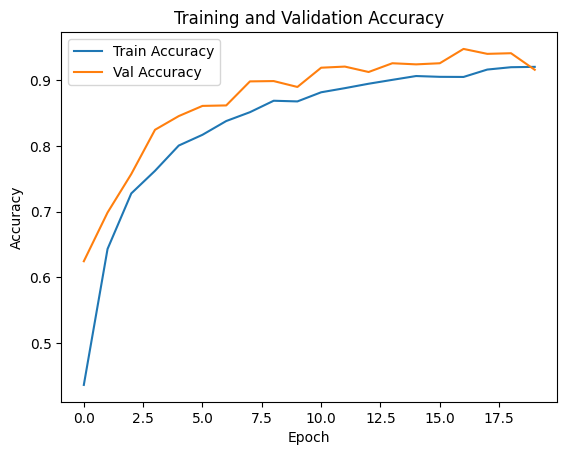

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [11]:
#Evaluating the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc*100:.2f}%')

129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9088 - loss: 0.2993
Validation Accuracy: 91.41%


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#saving the model
model.save('/content/drive/MyDrive/plant_disease_cnn_model.keras')
model.export('/content/drive/MyDrive/plant_disease_cnn_model')

Saved artifact at '/content/drive/MyDrive/plant_disease_cnn_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  137821007964368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007965520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007963792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007966288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007965712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007967056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007966480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007967824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007967248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137821007968592: TensorSpec(shape=(), dtype=tf.res

In [22]:
#testing on new image
from google.colab import files
uploaded = files.upload()

Saving bactrial_peper.jpg to bactrial_peper.jpg


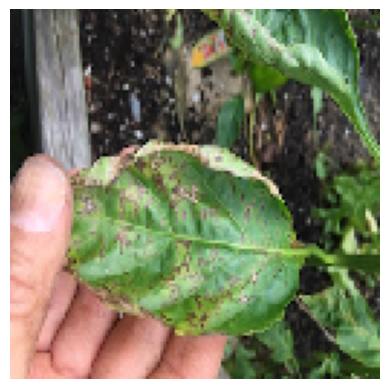

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Disease: Pepper__bell___Bacterial_spot


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img('bactrial_peper.jpg', target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocessing the input image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Prediction
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f'Predicted Disease: {predicted_class}')